# Feature importance
In this notebook we illustrate the computation of feature importance for a gaussian process.

In [1]:
from fastai.tabular.all import *
from tabularGP import tabularGP_learner

## Data

Builds a regression problem on a subset of the adult dataset:

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv').sample(1000)
procs = [FillMissing, Normalize, Categorify]

In [3]:
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'salary']
cont_names = ['education-num', 'fnlwgt']
dep_var = 'age'

In [4]:
data = TabularDataLoaders.from_df(df, path, procs=procs, cat_names=cat_names, cont_names=cont_names, y_names=dep_var)

## Model

In [5]:
learn = tabularGP_learner(data)

In [6]:
learn.fit_one_cycle(5, max_lr=1e-3)

epoch,train_loss,valid_loss,time
0,7.032825,7.686702,00:04
1,6.829724,7.372611,00:02
2,6.651076,7.320612,00:02
3,6.504872,7.321466,00:02
4,6.429901,7.337705,00:02


## Feature importance

You can get direct access to the importance of each feature, stored in a dataframe, using the `feature_importance` field.  
This information is deduced from the parameters of the kernel (mostly the scales) and can be accessed instantly:

In [7]:
learn.feature_importance

,Variable,Importance
0,workclass,0.022217
1,education,0.018056
2,marital-status,0.021578
3,occupation,0.025981
4,relationship,0.024354
5,race,0.028498
6,salary,0.024932
7,education-num_na,0.010095
8,education-num,0.026209
9,fnlwgt,0.027699


You can also plot them directly for a quick analysis (parameters are forwarded to the [Pandas plotting function](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)):

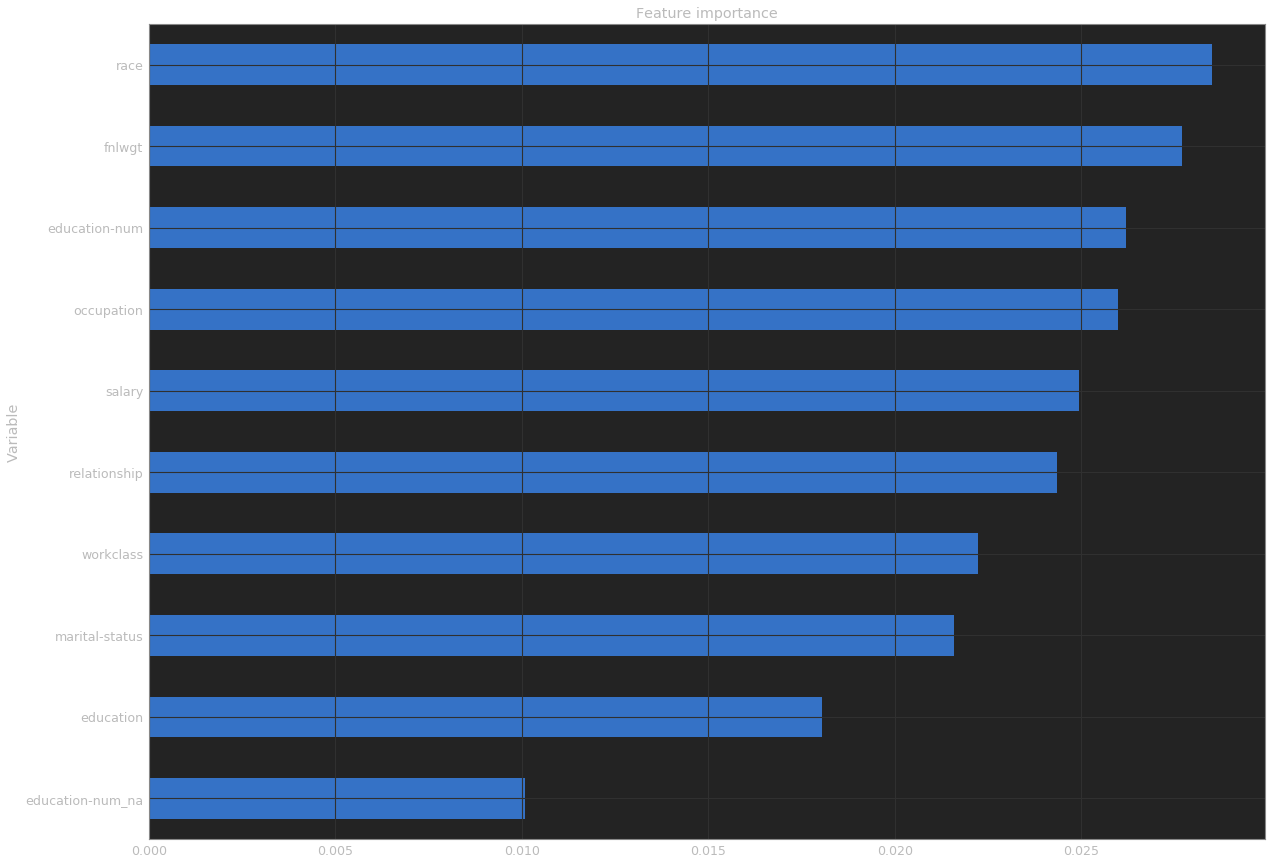

In [8]:
learn.plot_feature_importance()